##  Road Traffic Severity Classification

**Description**: This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 

**Problem Statement**: The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features. Metric for evaluation will be f1-score.

## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
## reading the dataset
df = pd.read_csv('RTA Dataset.csv')

In [3]:
df   # prints top 5 and last 5  records

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Exploratory Data Analysis

Exploratory Data Analysis is the first step in understanding your data and acquiring domain knowledge. It helps in knowing the real features apart. Perform EDA using the following resources and note down your insights with the most visualizations that you perform.

In [4]:
df.shape

(12316, 32)

In [5]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [6]:
# renaming columns for my convenience 
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map, inplace=True)

In [7]:
# converting 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   time                     12316 non-null  datetime64[ns]
 1   day_of_week              12316 non-null  object        
 2   driver_age               12316 non-null  object        
 3   driver_sex               12316 non-null  object        
 4   educational_level        11575 non-null  object        
 5   vehicle_driver_relation  11737 non-null  object        
 6   driving_experience       11487 non-null  object        
 7   vehicle_type             11366 non-null  object        
 8   vehicle_owner            11834 non-null  object        
 9   service_year             8388 non-null   object        
 10  vehicle_defect           7889 non-null   object        
 11  accident_area            12077 non-null  object        
 12  lanes                    11931 n

In [8]:
df.describe(include=['O']).T

,count,unique,top,freq
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883
vehicle_defect,7889,3,No defect,7777


In [9]:
df.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [10]:
# print duplicates
print("Number of duplicates: ", df.duplicated().sum())
print("Unique values per column:")
df.nunique()

Number of duplicates:  0
Unique values per column:


time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
educational_level             7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                3
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
road_surface_conditions       4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [11]:
# extracting hour and minute from timestamp
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df.drop('time', axis=1, inplace=True)

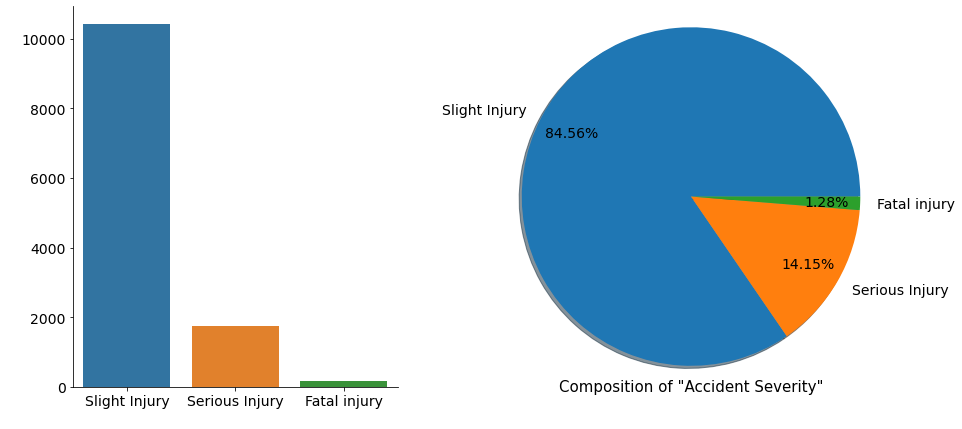

In [12]:
# checking the target by plotting
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["accident_severity"].value_counts(),
        labels=list(df["accident_severity"].unique()),
        autopct='%1.2f%%',
        # labels position
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)  # labelpad for positioning label
plt.subplots_adjust(wspace=0.4)
plt.show()

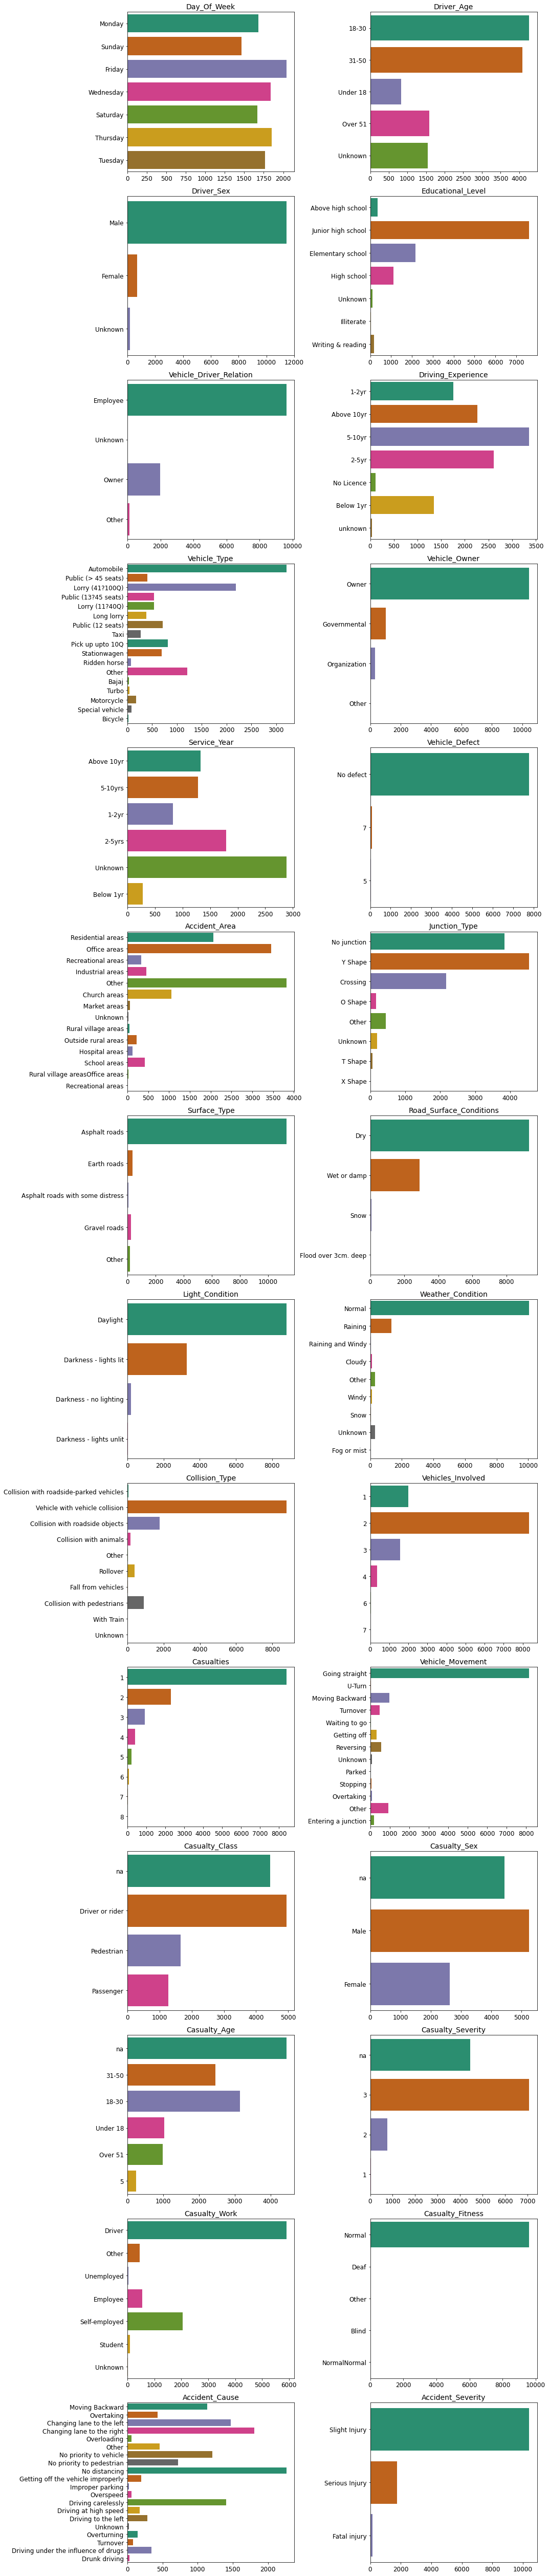

In [13]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(14,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

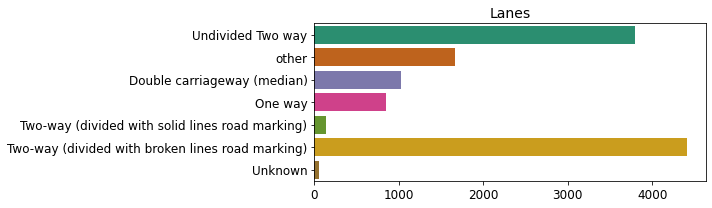

In [14]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

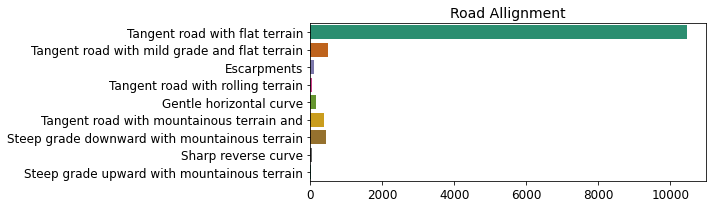

In [15]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()   #adjust subplot parameters automatically

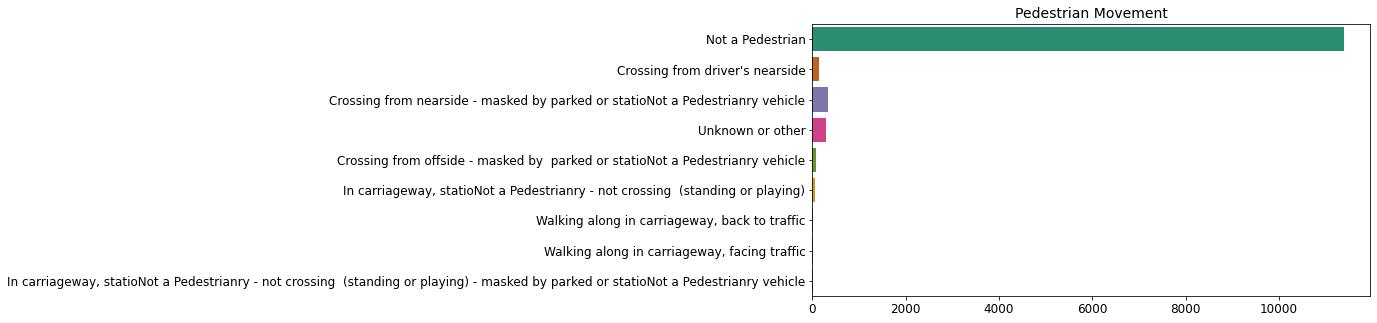

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

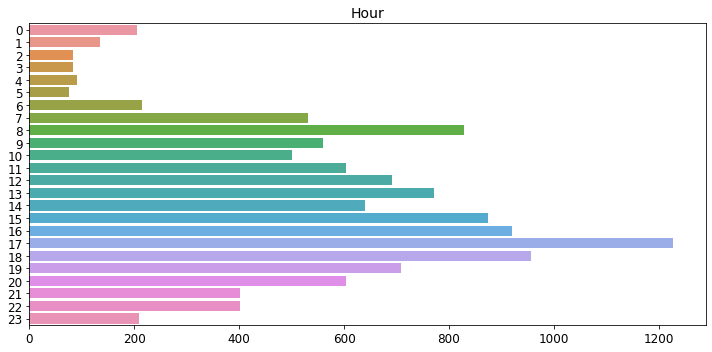

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

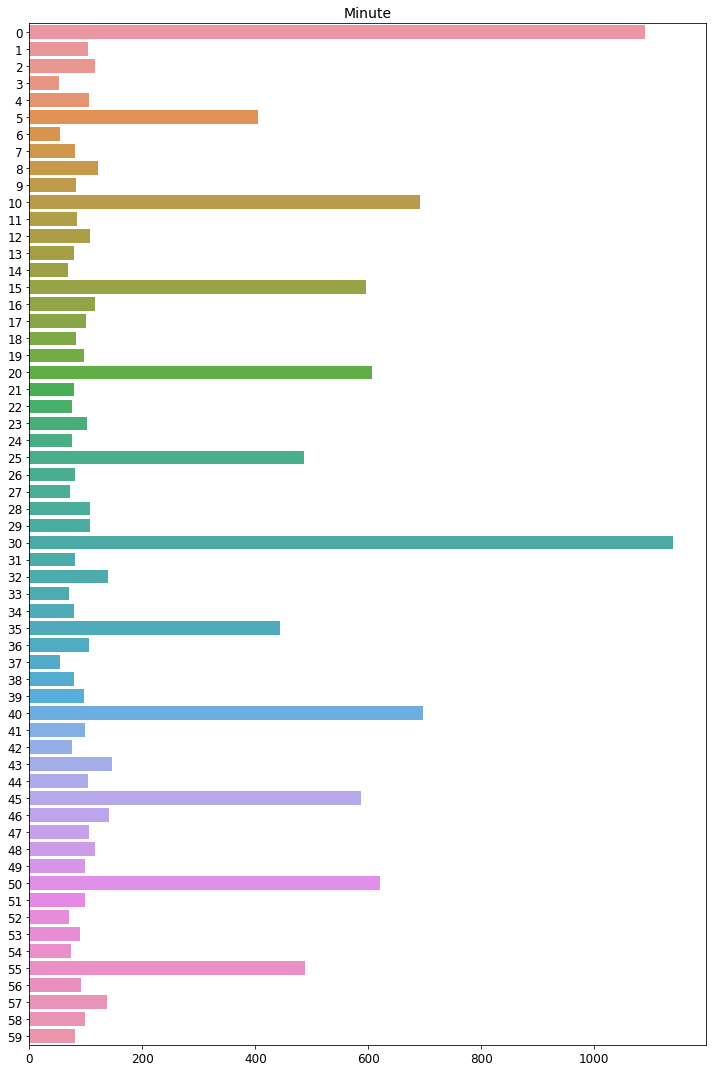

In [18]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

Here we can see that most of the accidents too place on multiple of 5, hence binning them would be a great option.

In [19]:
## model generalize in same way as visualisation hence it's important

In [20]:
## binning
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [21]:
df['minute'] = df['minute'].apply(lambda x: convert_minutes(x))

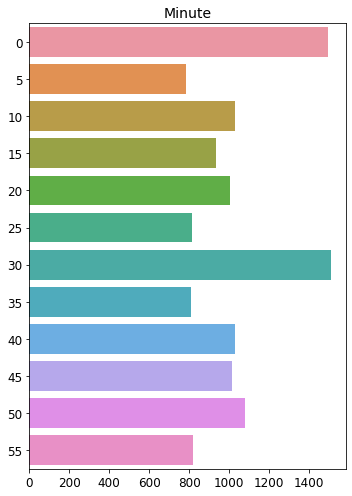

In [22]:
plt.figure(figsize=(5,7))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### Observations:

Most of the accidents:
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours

Most of the drivers:
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents


* Most of the accidents have taken place between 3pm to 6pm with maximum numbers at 5 pm
* Most of the time in minutes seems to have been recorded in intervals of 5 minutes for the sake of convenience. Hence more numbers to be seen at the 0 and 30 minutes.

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.

After EDA where we have done our analysis and we have gathered insights. Now, we know about the dataset and its distribution. We know about relations present in the data as well as vulnerabilities of the dataset.

## Preprocessing 
Mending the vulnerabilities present in  dataset for modelling.

Data preprocessing is a proven method for resolving issues with incomplete, noisy, and inconsistent raw input data. Issues such as ambiguous and unexpected results of modeling on raw data. With the insights of EDA, we've understood the shortcomings of our dataset. Use preprocessing techniques to clean and remove those vulnerabilities from the dataset.

In [23]:
df.replace('na',np.nan,inplace = True)

In [24]:
df.isna().sum()[df.isna().sum() != 0]

educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
collision_type              155
vehicle_movement            308
casualty_class             4443
casualty_sex               4443
casualty_age               4443
casualty_severity          4443
casualty_work              3198
casualty_fitness           2635
dtype: int64

In [25]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness',], inplace=True)

In [26]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]     ## value at index 0
    df[feat].fillna(mode, inplace=True)

In [27]:
df.isna().sum() 

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

In [28]:
df
# remember unknown values are still there

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Above 10yr,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Driver or rider,Male,18-30,3,Not a Pedestrian,Moving Backward,Slight Injury,17,5
1,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,5-10yrs,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Driver or rider,Male,18-30,3,Not a Pedestrian,Overtaking,Slight Injury,17,5
2,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,Unknown,Recreational areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17,5
3,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,Unknown,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1,10
4,Sunday,18-30,Male,Junior high school,2-5yr,Automobile,Owner,5-10yrs,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Driver or rider,Male,18-30,3,Not a Pedestrian,Overtaking,Slight Injury,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,Junior high school,2-5yr,Lorry (11?40Q),Owner,Unknown,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,Male,18-30,3,Not a Pedestrian,No distancing,Slight Injury,16,15
12312,Sunday,Unknown,Male,Elementary school,5-10yr,Automobile,Owner,Unknown,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Driver or rider,Male,18-30,3,Not a Pedestrian,No distancing,Slight Injury,18,0
12313,Sunday,Over 51,Male,Junior high school,5-10yr,Bajaj,Owner,2-5yrs,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury,13,55
12314,Sunday,18-30,Female,Junior high school,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Driver or rider,Male,18-30,3,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13,55


In [29]:
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(df, df.drop(['accident_severity'], axis=1).columns)
df.shape


(12316, 29)

In [30]:
feat_val = list(1+np.arange(df['day_of_week'].nunique()))
feat_val

[1, 2, 3, 4, 5, 6, 7]

In [31]:
feat_key = list(df['day_of_week'].sort_values().unique())
feat_key

[1, 2, 3, 4, 5, 6, 7]

In [32]:
# zip(feat_key, feat_val)

In [33]:
feat_dict = dict(zip(feat_key, feat_val))
feat_dict

{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}

In [34]:
df

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,2,1,2,1,1,1,4,4,10,3,6,2,1,1,4,3,4,2,2,3,1,2,1,3,6,10,Slight Injury,18,2
1,2,2,2,5,4,12,4,3,7,5,6,2,1,1,4,3,9,2,2,3,1,2,1,3,6,17,Slight Injury,18,2
2,2,1,2,5,1,6,4,6,2,7,6,2,1,1,4,3,3,2,2,3,1,2,2,3,6,1,Serious Injury,18,2
3,4,1,2,5,3,12,1,6,7,7,7,8,3,1,1,3,9,2,2,3,3,1,1,3,6,2,Slight Injury,2,3
4,4,1,2,5,2,1,4,3,5,7,6,8,1,1,1,3,9,2,2,3,1,2,1,3,6,17,Slight Injury,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,7,2,2,5,2,5,4,6,6,5,6,2,1,1,4,3,9,2,1,3,1,2,1,3,6,11,Slight Injury,17,4
12312,4,5,2,2,3,1,4,6,6,3,1,2,1,1,4,3,9,2,1,5,1,2,1,3,6,11,Slight Injury,19,1
12313,4,3,2,5,3,2,4,2,6,3,8,2,1,1,4,3,9,1,1,5,1,2,2,3,6,2,Serious Injury,14,12
12314,4,1,1,5,4,6,4,2,7,5,8,2,1,1,1,3,9,2,1,5,1,2,1,3,6,6,Slight Injury,14,12


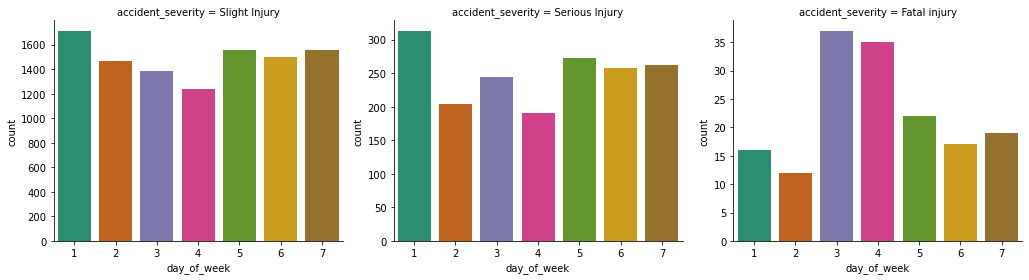

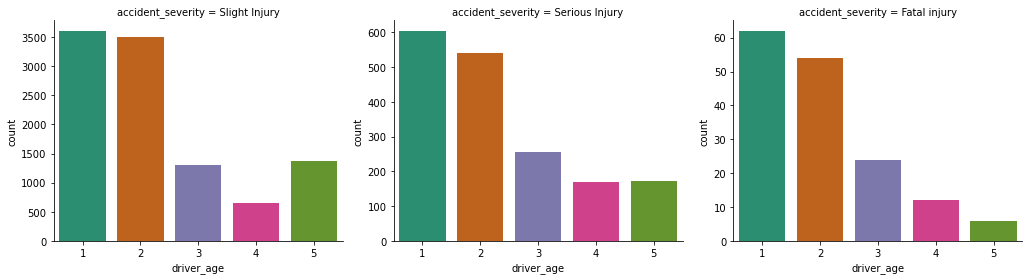

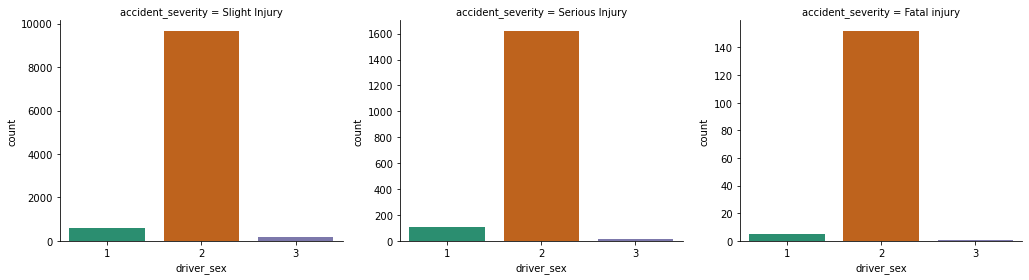

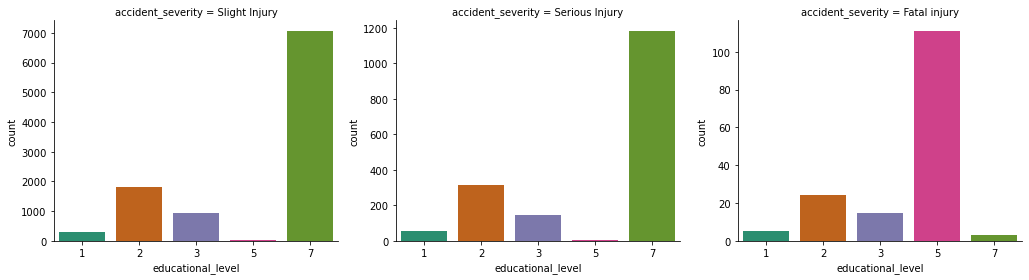

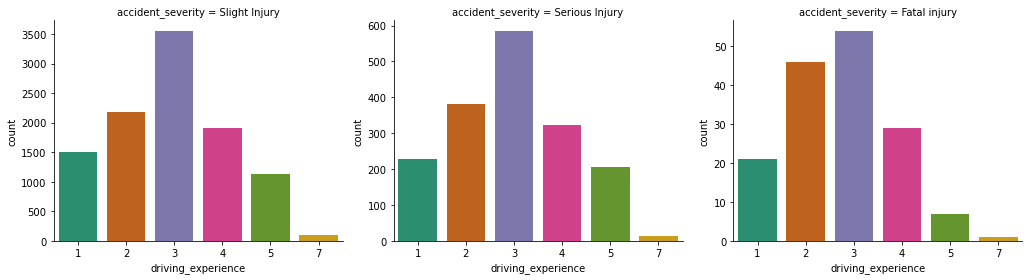

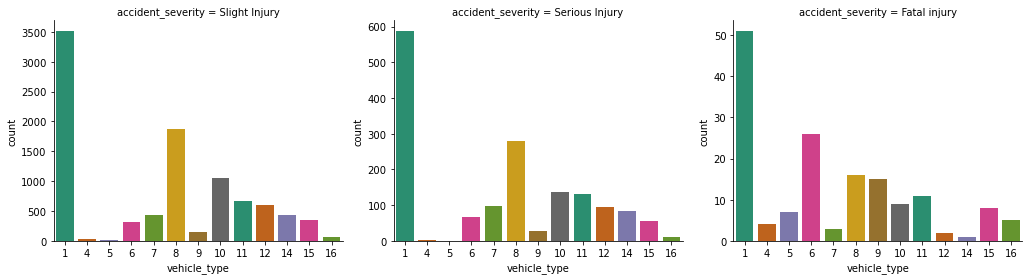

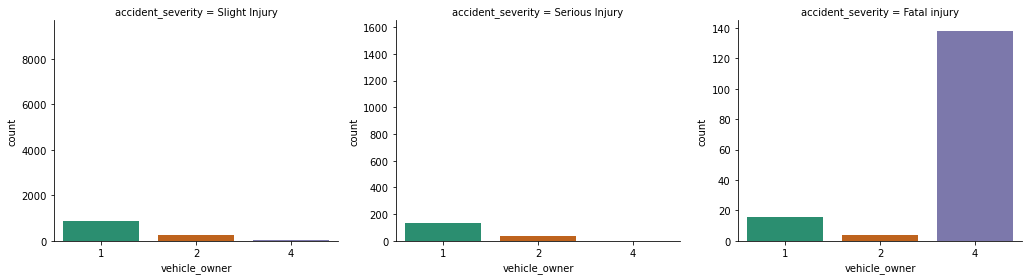

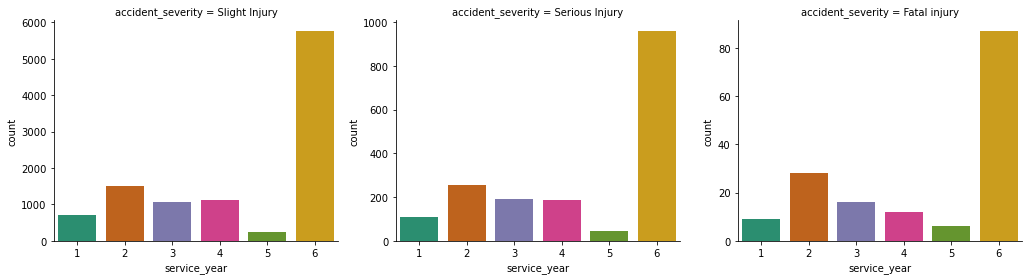

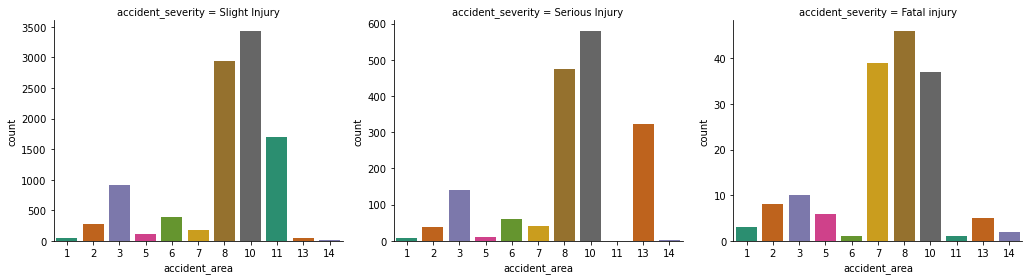

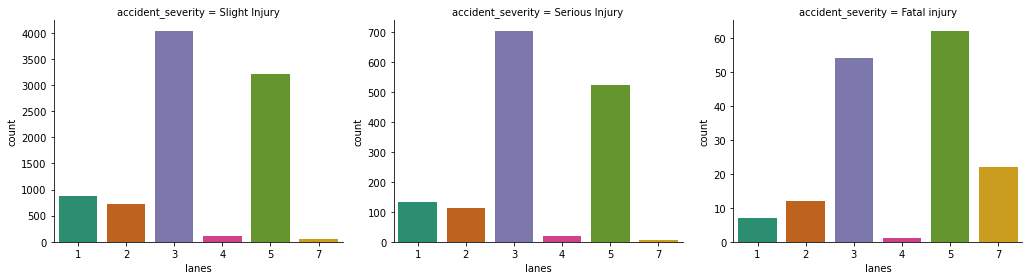

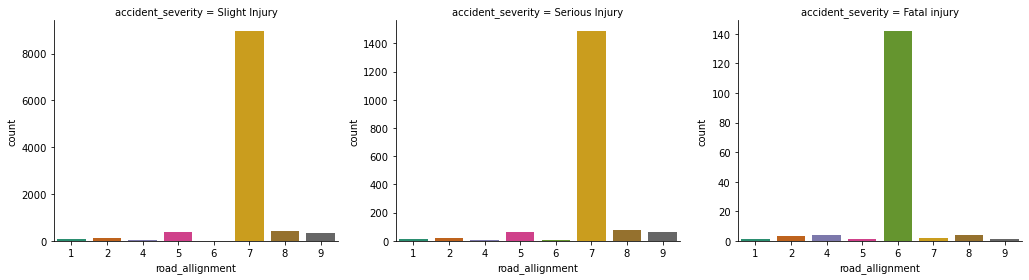

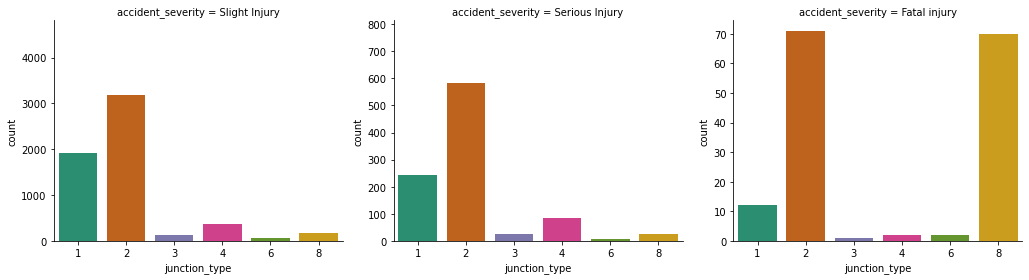

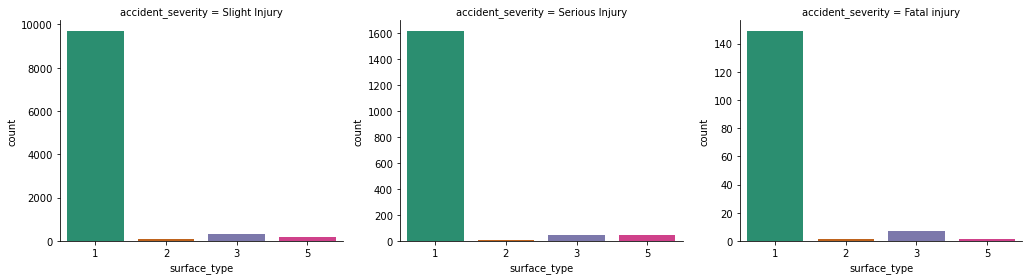

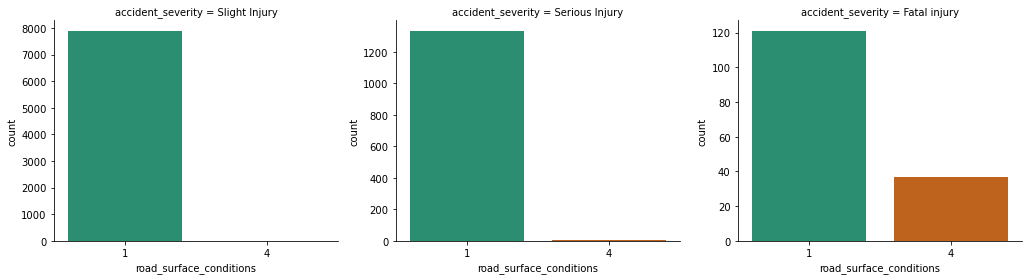

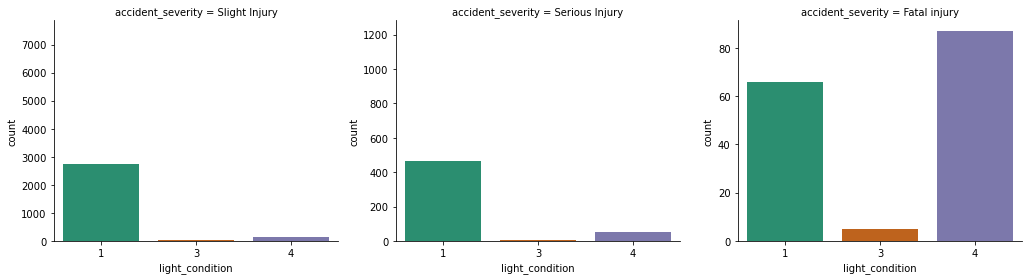

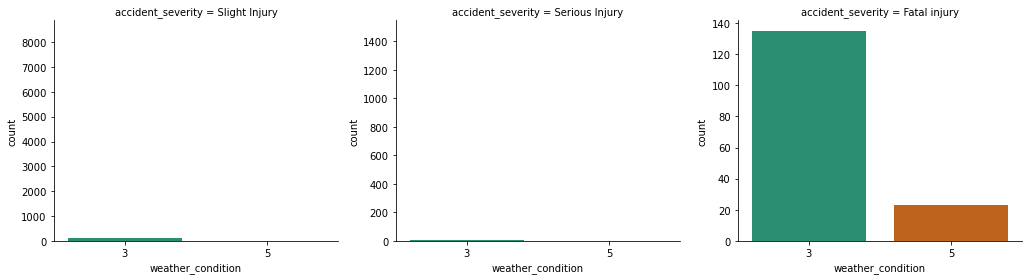

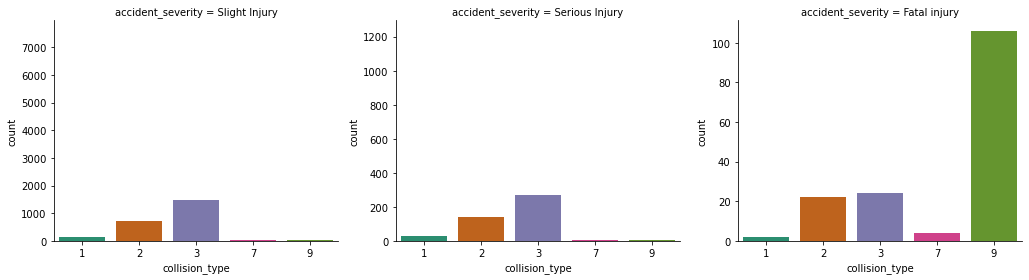

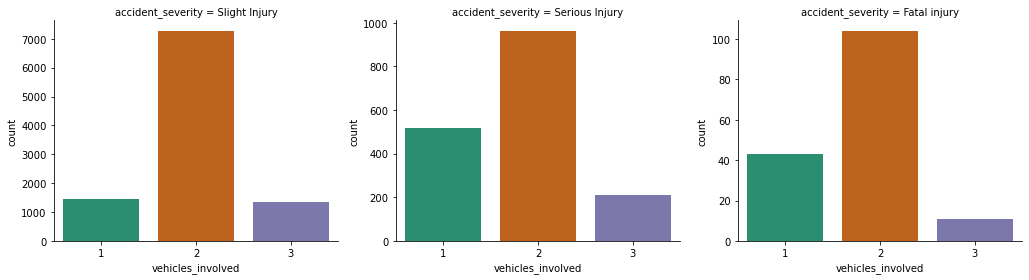

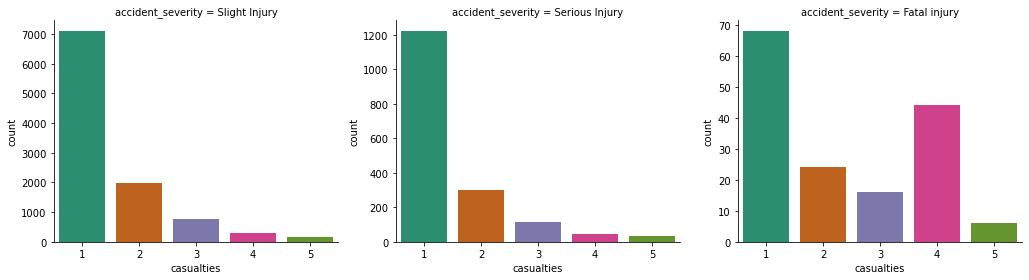

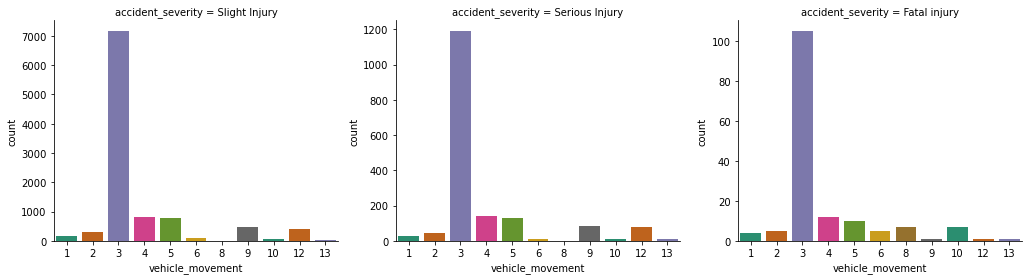

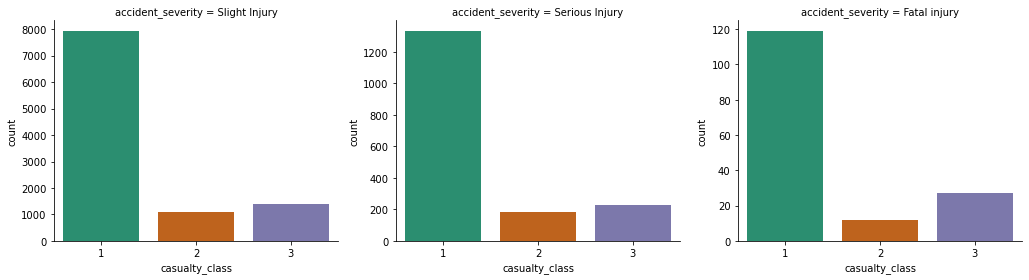

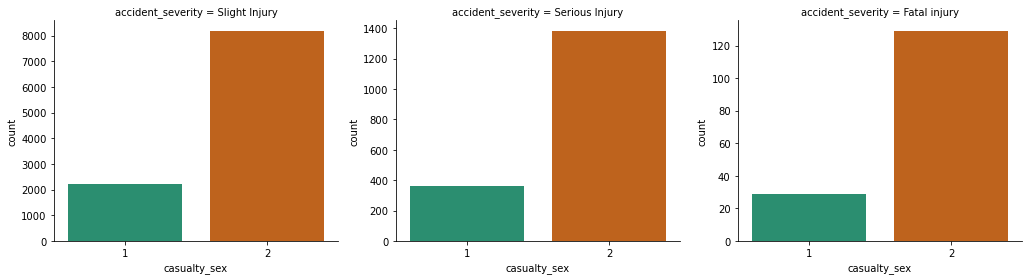

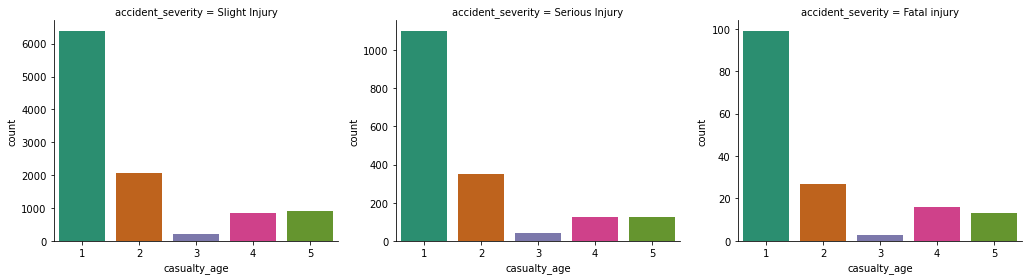

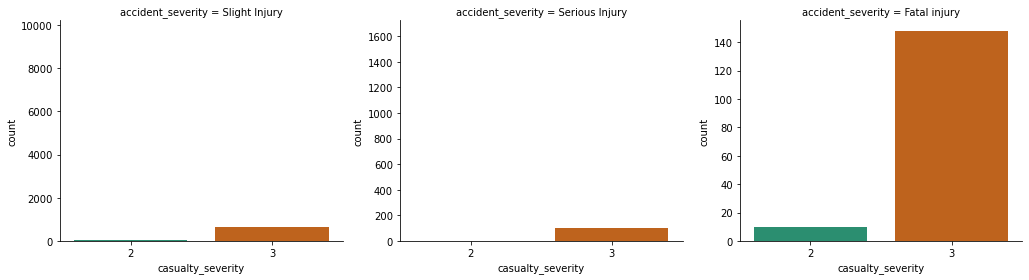

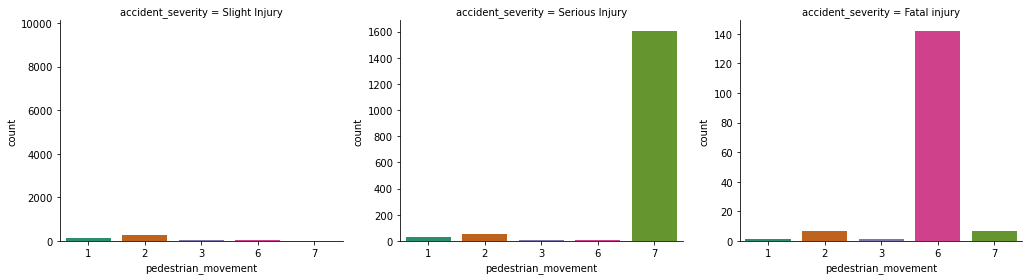

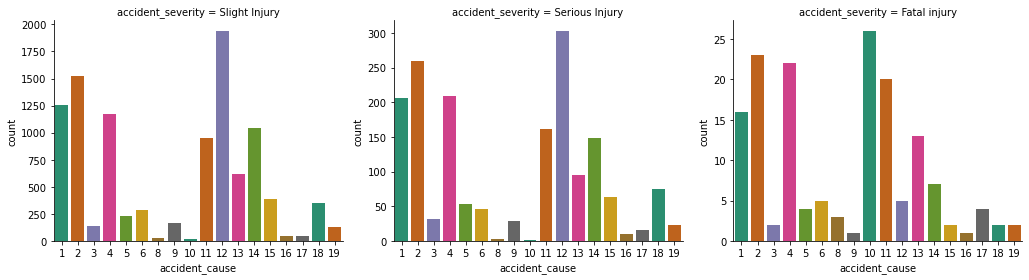

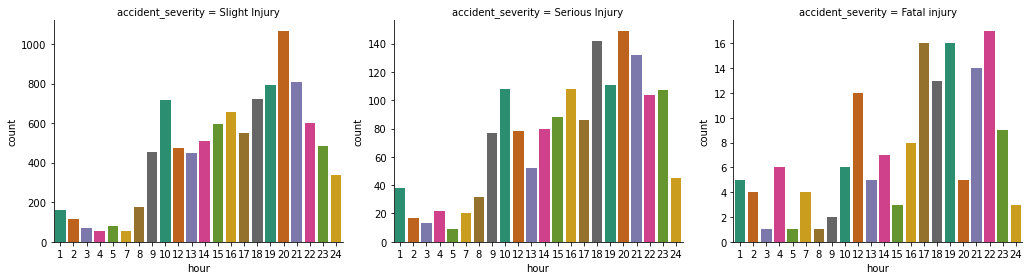

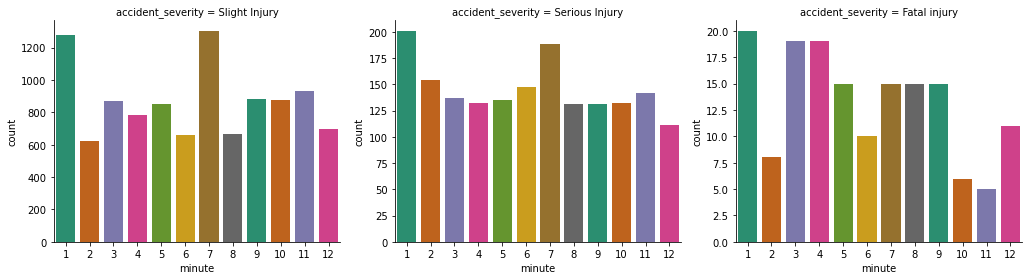

In [35]:
for col in df.drop('accident_severity', axis=1):
    g = sns.FacetGrid(df, col='accident_severity', size=4, aspect=1.2, sharey=False)
    # Apply a plotting function to each facet's subset of the data.
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

#### Observations:

* Most of the accidents with fatal injuries happened between 2pm to 7pm.
* Most of the accidents with fatal injuries happened on weekends.
* Highest number of non-fatal injuries happened at 5pm.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

## Upsampling

In [36]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [37]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


In [38]:
y_test

4281      Slight Injury
4010      Slight Injury
1022     Serious Injury
8775      Slight Injury
10000     Slight Injury
              ...      
9855      Slight Injury
7302     Serious Injury
9023      Slight Injury
7936      Slight Injury
438       Slight Injury
Name: accident_severity, Length: 3695, dtype: object

In [39]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['accident_severity']), pd.DataFrame(y_train, columns = ['accident_severity']).columns)['accident_severity']
y_test = y_test  - 1
y_train = y_train - 1

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [107]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
extree = ExtraTreesClassifier()

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = metrics.classification_report(y_test,y_pred)
    print(accuracy)
    print(precision)
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=["Fatal Injury", "Serious Injury", "Slightly Injury"],)
 
    cmp.plot(ax=ax)
    plt.show();


0.7918809201623817
              precision    recall  f1-score   support

           0       0.40      0.12      0.18        52
           1       0.27      0.19      0.22       552
           2       0.85      0.91      0.88      3091

    accuracy                           0.79      3695
   macro avg       0.51      0.40      0.43      3695
weighted avg       0.76      0.79      0.77      3695



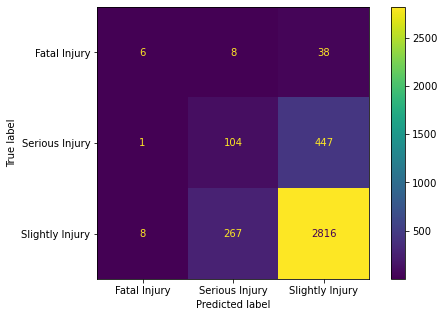

In [73]:
## random forest
train_classifier(rfc,X_train,y_train,X_test,y_test)

0.5991880920162381
              precision    recall  f1-score   support

           0       0.03      0.62      0.06        52
           1       0.25      0.15      0.19       552
           2       0.87      0.68      0.76      3091

    accuracy                           0.60      3695
   macro avg       0.38      0.48      0.34      3695
weighted avg       0.76      0.60      0.67      3695



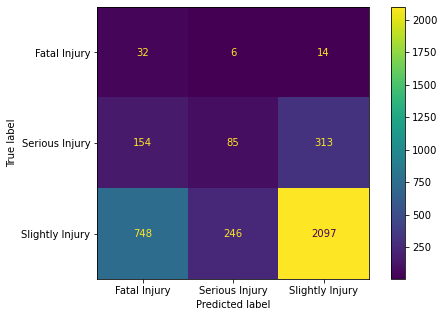

In [74]:
# decision tree classifier
train_classifier(dtc,X_train,y_train,X_test,y_test)

0.5821380243572395
              precision    recall  f1-score   support

           0       0.04      0.44      0.07        52
           1       0.19      0.26      0.22       552
           2       0.86      0.64      0.74      3091

    accuracy                           0.58      3695
   macro avg       0.36      0.45      0.34      3695
weighted avg       0.75      0.58      0.65      3695



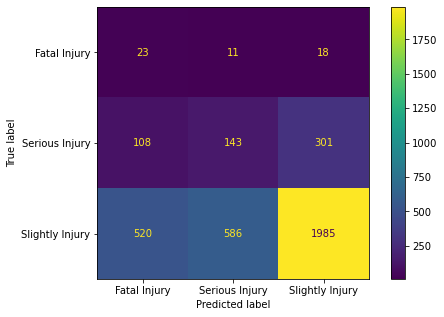

In [75]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

0.7918809201623817
              precision    recall  f1-score   support

           0       0.40      0.12      0.18        52
           1       0.27      0.19      0.22       552
           2       0.85      0.91      0.88      3091

    accuracy                           0.79      3695
   macro avg       0.51      0.40      0.43      3695
weighted avg       0.76      0.79      0.77      3695



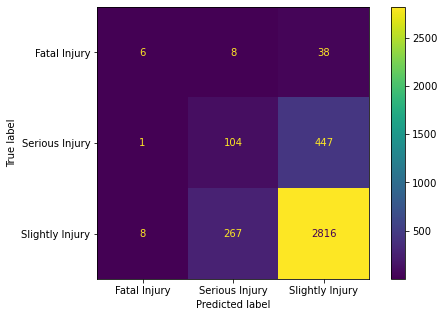

In [76]:
## random forest
train_classifier(rfc,X_train,y_train,X_test,y_test)


0.6276048714479026
              precision    recall  f1-score   support

           0       0.04      0.25      0.07        52
           1       0.18      0.29      0.22       552
           2       0.85      0.69      0.77      3091

    accuracy                           0.63      3695
   macro avg       0.36      0.41      0.35      3695
weighted avg       0.74      0.63      0.68      3695



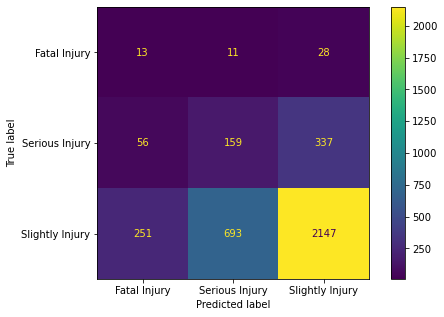

In [77]:
## adaboost
train_classifier(abc,X_train,y_train,X_test,y_test)

0.8129905277401894
              precision    recall  f1-score   support

           0       0.33      0.02      0.04        52
           1       0.32      0.15      0.21       552
           2       0.85      0.94      0.89      3091

    accuracy                           0.81      3695
   macro avg       0.50      0.37      0.38      3695
weighted avg       0.76      0.81      0.78      3695



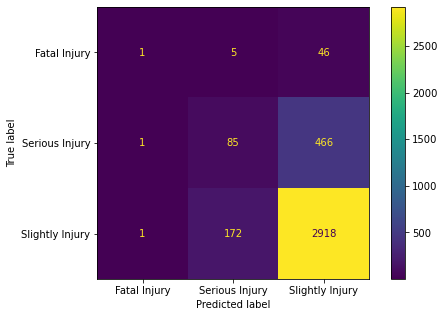

In [78]:

train_classifier(extree,X_train,y_train,X_test,y_test)

0.48525033829499326
              precision    recall  f1-score   support

           0       0.03      0.23      0.05        52
           1       0.17      0.43      0.24       552
           2       0.85      0.50      0.63      3091

    accuracy                           0.49      3695
   macro avg       0.35      0.39      0.31      3695
weighted avg       0.74      0.49      0.56      3695



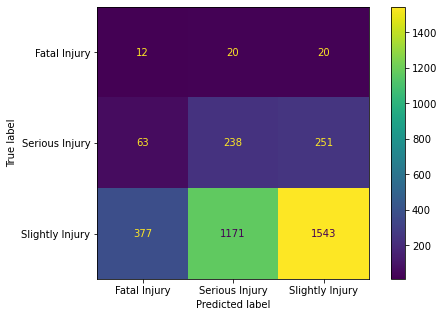

In [80]:
## knc
train_classifier(knc,X_train,y_train,X_test,y_test)


In [82]:
##!pip install lazypredict


In [53]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)


In [54]:
### fitting data in LazyClassifier
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
### lets check which model did better on our Dataset
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [09:39<00:00, 19.99s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearDiscriminantAnalysis         0.57               0.46    None      0.64   
LogisticRegression                 0.57               0.45    None      0.64   
RidgeClassifierCV                  0.58               0.45    None      0.65   
RidgeClassifier                    0.58               0.45    None      0.65   
SGDClassifier                      0.59               0.45    None      0.65   
NearestCentroid                    0.54               0.45    None      0.62   
CalibratedClassifierCV             0.59               0.44    None      0.65   
LinearSVC                          0.59               0.44    None      0.65   
KNeighborsClassifier               0.55               0.44    None      0.62   
LGBMClassifier                     0.78               0.43    None      0.77   
BaggingClassifier                  0.73 

In [55]:
models = models.sort_values(by = 'F1 Score', ascending = False)

We can see **Extra Tree Classifier** performs best on our dataset. Other classifiers like RandomForestClassifier,XGBClassifier, XGBClassifier gave same F1- score but the accuracy corresponding to each of them is lesser than ExtraTreeClassifier.
For better understanding, let's create barplot.

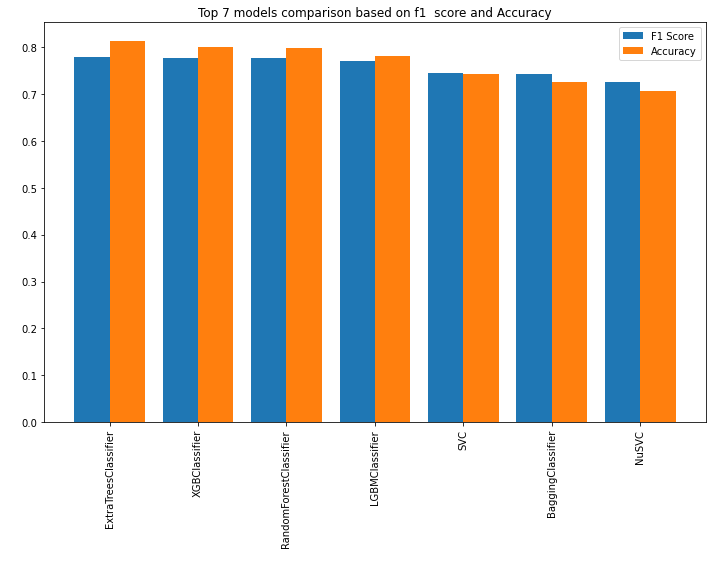

In [64]:
x = list(models.index[:7])
y_axis = list(models['F1 Score'].values[:7])
y_axis_1 = list(models['Accuracy'].values[:7])
x_axis = np.arange(len(x))
plt.figure(figsize = (10,8))
plt.bar(x_axis - 0.2, y_axis, 0.4, label = 'F1 Score')
plt.bar(x_axis + 0.2, y_axis_1, 0.4, label = 'Accuracy')
plt.xticks(x_axis, x,rotation = 90) 
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("Top 7 models comparison based on f1  score and Accuracy")
plt.legend()
plt.tight_layout()

## Artificial Neural Network(ANN)

In [65]:
import tensorflow as tf
from tensorflow import keras

### Initialising Artificial Neural Network

In [58]:
#Initialising ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

Here we have created our first hidden layer by using the Dense class which is part of the layers module. This class accepts 2 inputs:-

1. units:- number of neurons that will be present in the respective layer

2. activation:- specify which activation function to be used

For the first input, I had tested with many values in the past and the optimal value that I had found is 6. Obviously, we can try with any other value as there is no hard rule about the number of neurons that should be present in the layer.

For the second input, we are always going to use “relu”[rectified linear unit] as an activation function for hidden layers. Since we are going to create two hidden layers, this same step we are going to repeat for the creation of the second hidden layer as well.

In [59]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

## Creating Output Layer


In [100]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="softmax"))

Here again, we are going to use the Dense class in order to create the output layer

In [111]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

We have used compile method of our ann object in order to compile our network. Compile method accepts the below inputs:-

1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent. I had experimented with various optimizers like RMSProp, adam and I have found that adam optimizer is a reliable one that can be used with any neural network.

2. loss:- specifies which loss function should be used. For binary classification, the value should be binary_crossentropy. For multiclass classification, it should be categorical_crossentropy.

3. metrics:- which performance metrics to be used in order to compute performance. Here we have used f1 score as a performance metric

In [113]:
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 20)

Epoch 1/20
687/687 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0.3333
Epoch 2/20
687/687 [==============================] - 1s 2ms/step - loss: 0.0116 - accuracy: 0.3333
Epoch 3/20
687/687 [==============================] - 1s 2ms/step - loss: 0.0105 - accuracy: 0.3333
Epoch 4/20
687/687 [==============================] - 1s 2ms/step - loss: 0.0096 - accuracy: 0.3333
Epoch 5/20
687/687 [==============================] - 1s 2ms/step - loss: 0.0088 - accuracy: 0.3333
Epoch 6/20
687/687 [==============================] - 1s 2ms/step - loss: 0.0081 - accuracy: 0.3333
Epoch 7/20
687/687 [==============================] - 1s 2ms/step - loss: 0.0075 - accuracy: 0.3333
Epoch 8/20
687/687 [==============================] - 1s 2ms/step - loss: 0.0070 - accuracy: 0.3333
Epoch 9/20
687/687 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 0.3333
Epoch 10/20
687/687 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.3333

In [63]:
y_pred_1 = ann.predict(X_test)

116/116 [==============================] - 0s 1ms/step


Here we have used the fit method in order to train our ann. The fit method is accepting 4 inputs in this case:-

1.X_train:- Matrix of features for the training dataset

2.Y_train:- Dependent variable vectors for the training dataset

3.batch_size: how many observations should be there in the batch. Usually, the value for this parameter is 32 but we can experiment with any other value as well.

4. epochs: How many times neural networks will be trained. Here the optimal value that I have found from my experience is 100.

Here we can see that in each epoch our loss is decreasing but our accuracy is not increasing because the dataset is not large enough. As we can see here that our final accuracy is 0.3333 which is quite low and previous algorithms worked better than ANN due to having less number of records present in our dataset.

## Further Steps

* Hyperparameter tuning can be used for improving the metric score. We could use Randomised search or grid search for this purpose.
* We can also create a UI to make predictions easier and that web application can be used by businesses or government to improve the infrastructure and make improvements to reduce the number of accident cases.
* I've used only label encoder in this assignment but we can use different encoding techniques and pick the best one which gives the highest f1-score.

## Thank you !!